In [13]:
# TensorFlow / Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

print('TensorFlow/Keras: %s' % tf.__version__)
print('Keras: %s' % keras.__version__)

# Data manipulation
import pandas as pd
import numpy as np
import math

print('pandas:%s' % pd.__version__)
print('numpy: %s' % np.__version__)

# Scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

print('scikit-learn: %s' % sklearn.__version__)

# Visualization

import seaborn as sns

print('Seaborn: %s' % sns.__version__)


TensorFlow/Keras: 2.11.1
Keras: 2.11.0
pandas:2.0.1
numpy: 1.24.3
scikit-learn: 1.2.2
Seaborn: 0.12.2


In [14]:
import pandas as pd

# Read data
df = pd.read_csv('Housing.csv')

In [15]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
505,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
506,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
507,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     509 non-null    float64
 1   ZN       509 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     509 non-null    int64  
 4   NOX      507 non-null    float64
 5   RM       509 non-null    float64
 6   AGE      508 non-null    float64
 7   DIS      509 non-null    float64
 8   RAD      508 non-null    float64
 9   TAX      509 non-null    int64  
 10  PTRATIO  509 non-null    float64
 11  B        509 non-null    float64
 12  LSTAT    508 non-null    float64
 13  MEDV     509 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.8 KB


In [17]:
df.nunique()

CRIM       503
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        354
DIS        411
RAD          9
TAX         66
PTRATIO     46
B          356
LSTAT      453
MEDV       228
dtype: int64

In [18]:
print(df.isna().sum()) # shows missing value

CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64


In [19]:
# Can try'median', 'most_frequent', 'constant'
imputer = SimpleImputer(strategy='mean') 
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [20]:
explicit_titles = {
    'CRIM': 'Per capita crime rate by town',
    'ZN': 'Proportion of residential land zoned for lots over 25,000 sq.ft',
    'INDUS': 'Proportion of non-retail business acres per town',
    'CHAS': 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
    'NOX': 'Nitric oxides concentration (parts per 10 million)',
    'RM': 'Average number of rooms per dwelling',
    'AGE': 'Proportion of owner-occupied units built prior to 1940',
    'DIS': 'Weighted distances to five Boston employment centres',
    'RAD': 'Index of accessibility to radial highways',
    'TAX': 'Full-value property-tax rate per $10,000',
    'PTRATIO': 'Pupil-teacher ratio by town',
    'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
    'LSTAT': '% Lower status of the population',
    'MEDV': 'Median value of owner-occupied homes in $1000s'
}

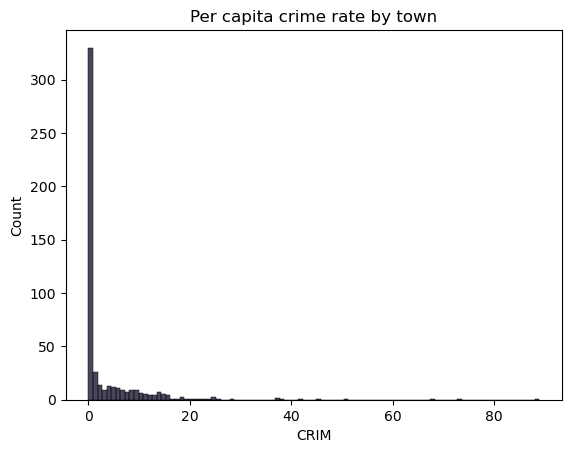

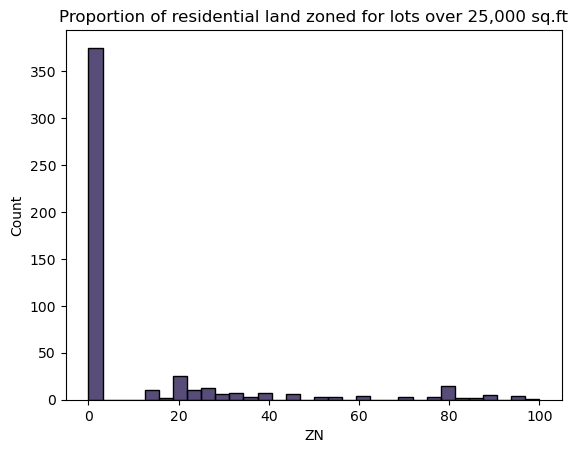

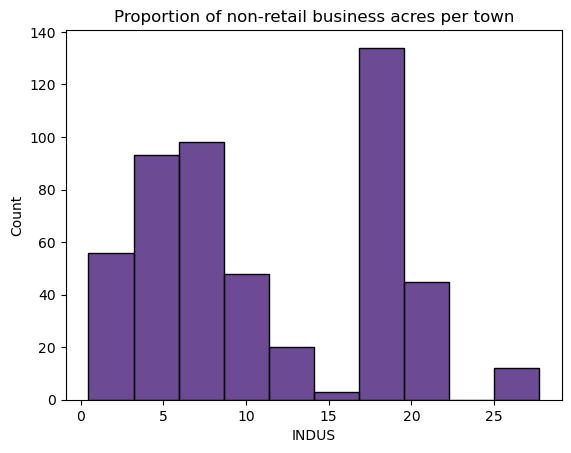

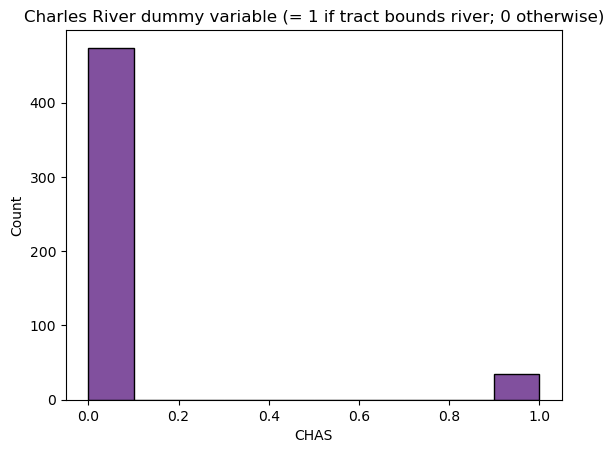

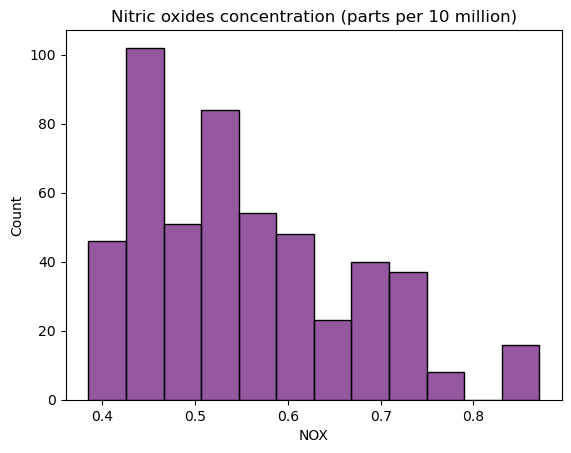

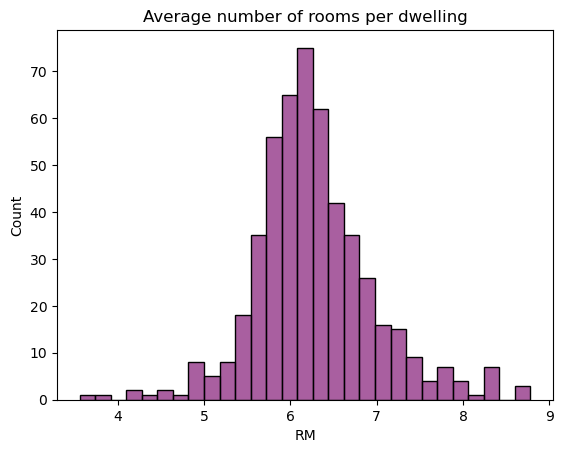

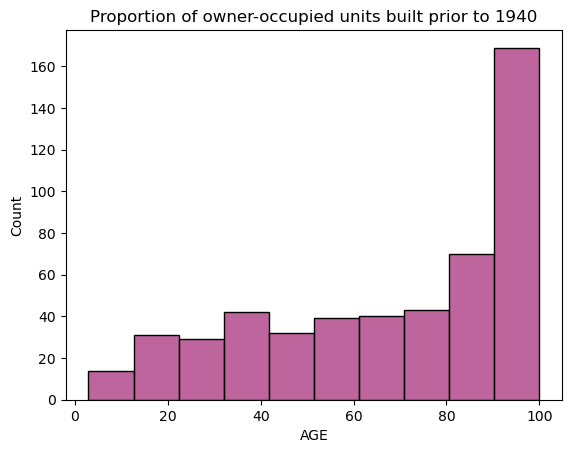

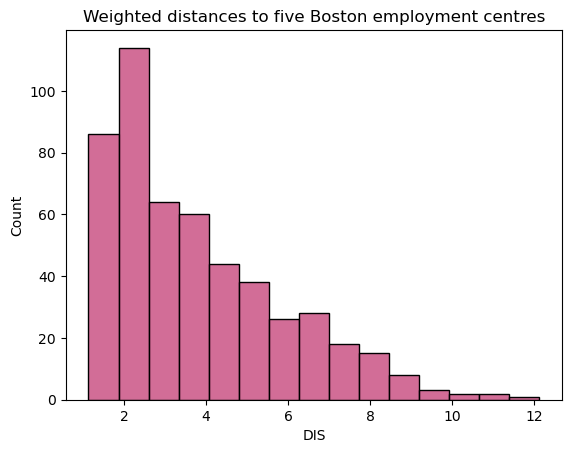

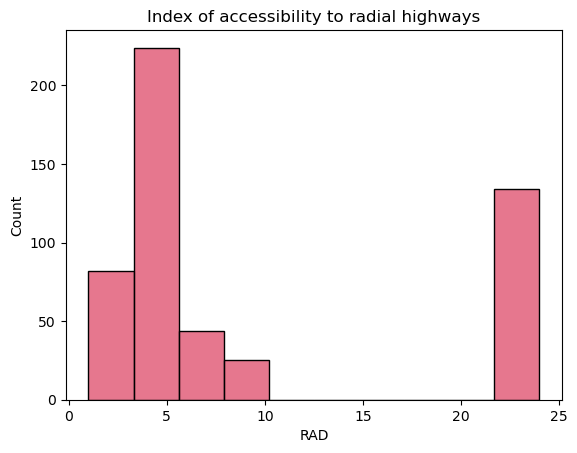

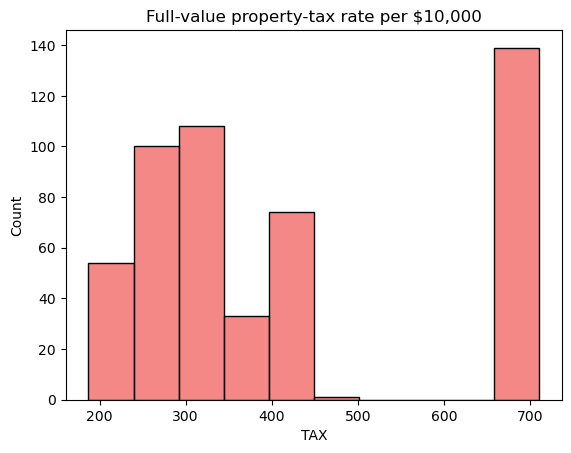

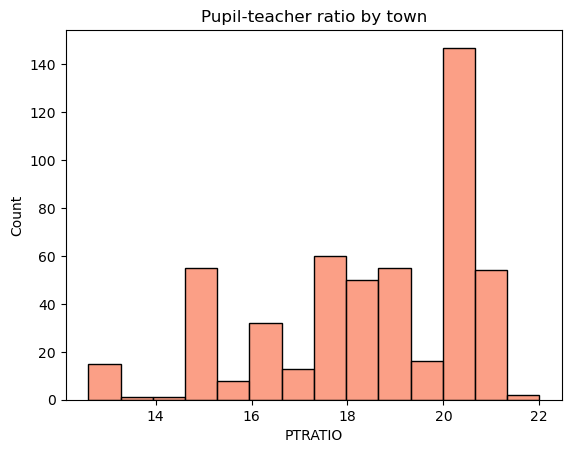

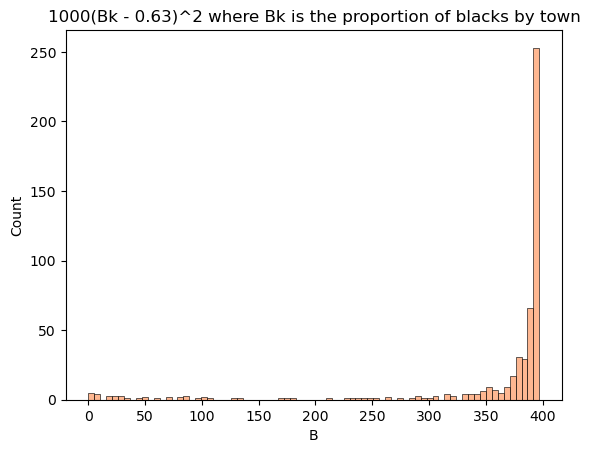

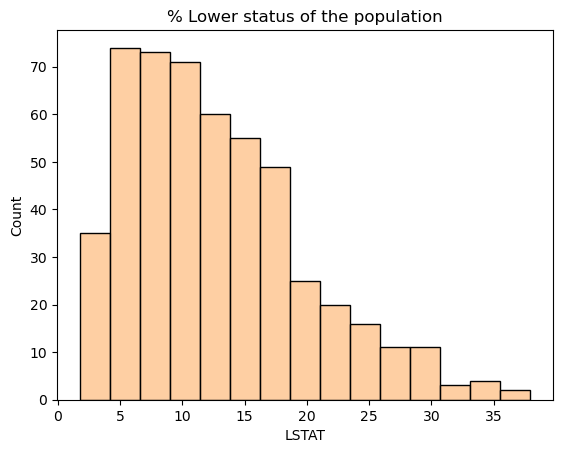

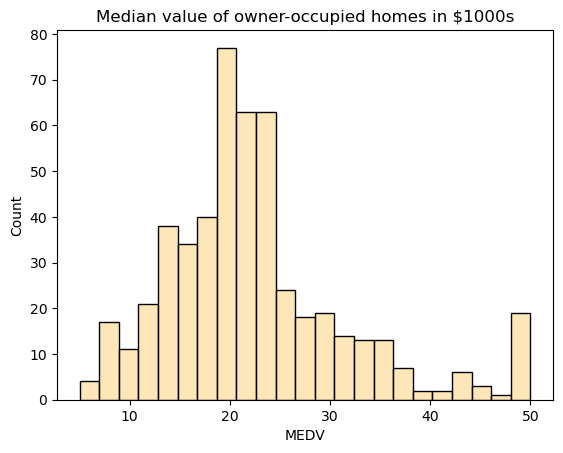

In [21]:
import matplotlib.pyplot as plt

# set a different color palette for each column
palette = sns.color_palette("magma", len(df.columns))

for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, color=palette[i])
    plt.title(explicit_titles[col])  # use the new column name as the title
    
    
    plt.show()


In [22]:

# Fit the scaler to the data and transform using scaler object
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df)

# Convert the normalized data back to a DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)


# feature -> MEDV
x= df_normalized.iloc[:,:-1]
y= df_normalized['MEDV']



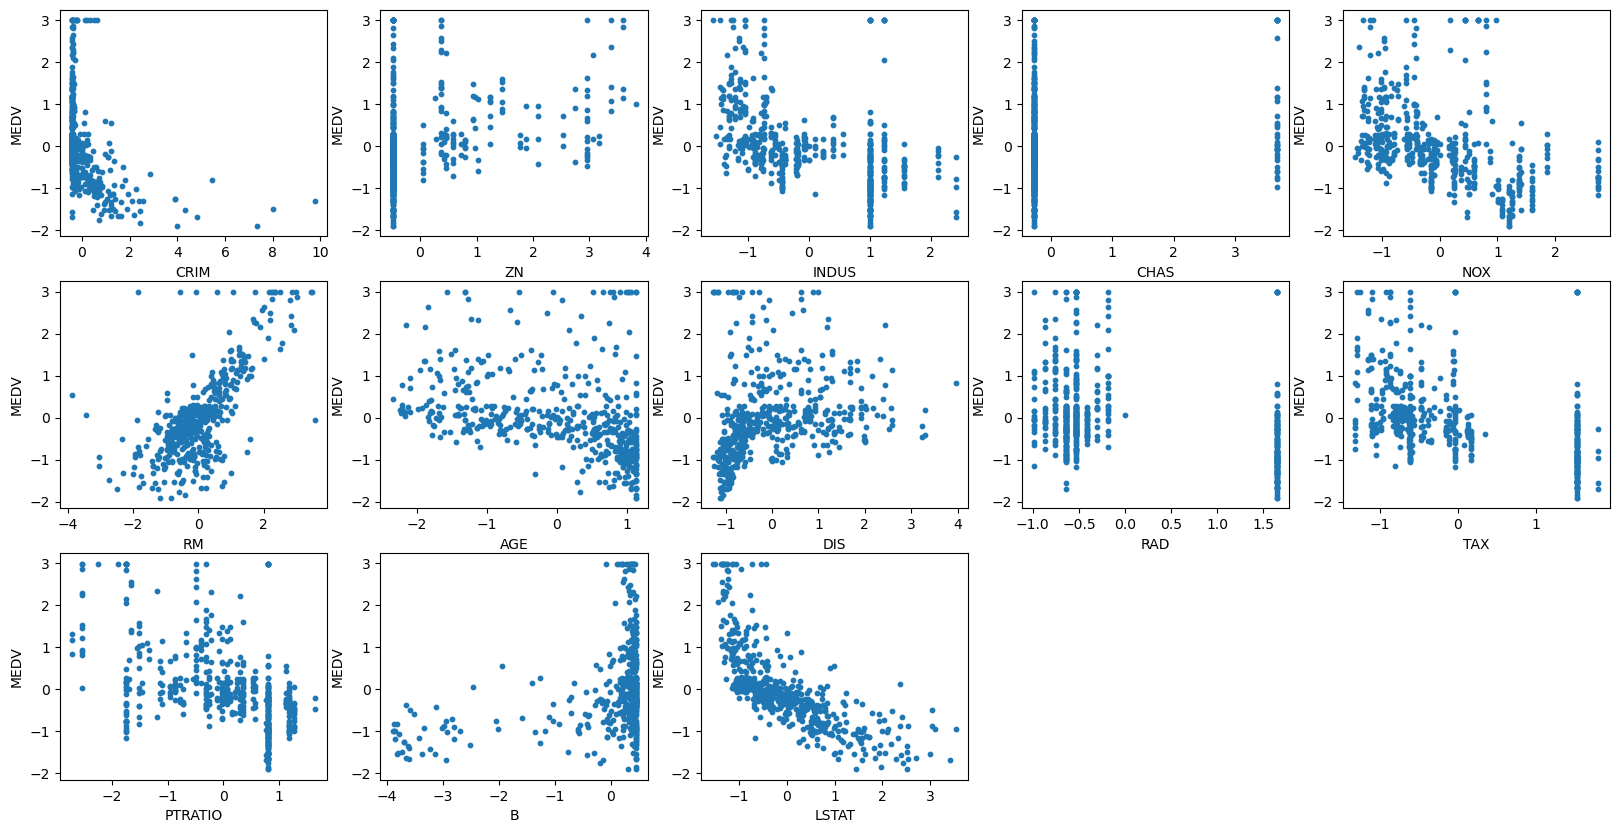

In [23]:

x= df_normalized.iloc[:,:-1]
y= df_normalized['MEDV']

fig = plt.figure(figsize=(20,10))
for i, col in enumerate(x.columns):
    plt.subplot(3,5,i+1)
    plt.scatter(x[col], y, s=10)
    plt.xlabel(col)
    plt.ylabel('MEDV')


In [24]:
# 80/20 train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
reg = LinearRegression().fit(x_train, y_train)
score = reg.score(x_test, y_test)
print("R^2 score: ", score)



R^2 score:  0.7988239576656755


4/4 [==============================] - 0s 977us/step


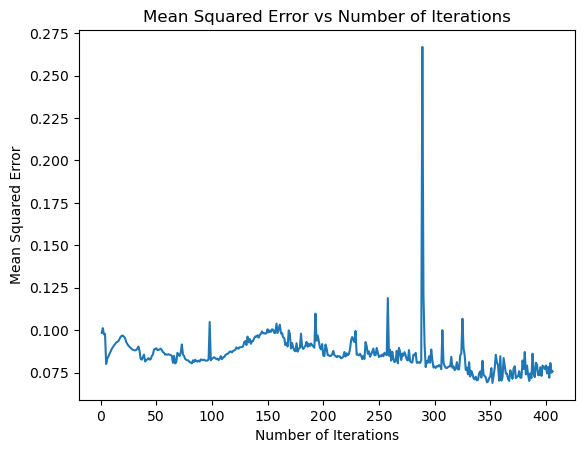

In [31]:
import matplotlib.pyplot as plt

# Train the model on the training data and store MSE values at each iteration
mse_values = []
for i in range(1, len(x_train)):
    model.fit(x_train[:i], y_train[:i])
    y_pred = model.predict(x_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

# Plot the MSE values against the iteration number
plt.plot(range(1, len(x_train)), mse_values)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Number of Iterations')
plt.show()

4/4 [==============================] - 0s 1ms/step
R-squared-train: 0.922954290141445


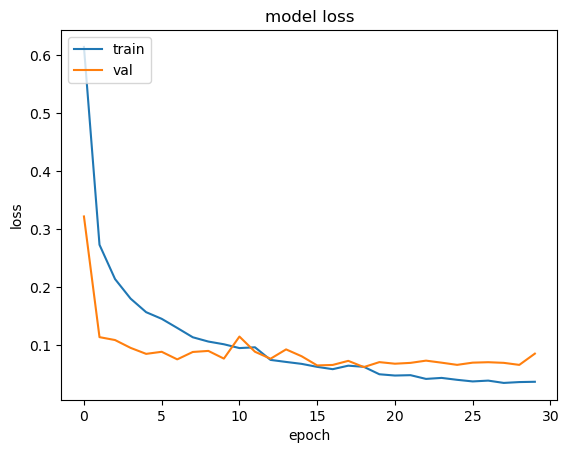

In [64]:
from sklearn.metrics import r2_score
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Convert to NumPy arrays
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()



model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128,activation='relu', input_shape=(x_train.shape[1],)))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))


# Compile the model
model.compile(optimizer='adam', loss='mse')


# Train the model
history = model.fit(x_train, y_train, epochs=30, batch_size=16, validation_data=(x_test, y_test), verbose=0)

# Predict on the test set
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R-squared-train:", r2)



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


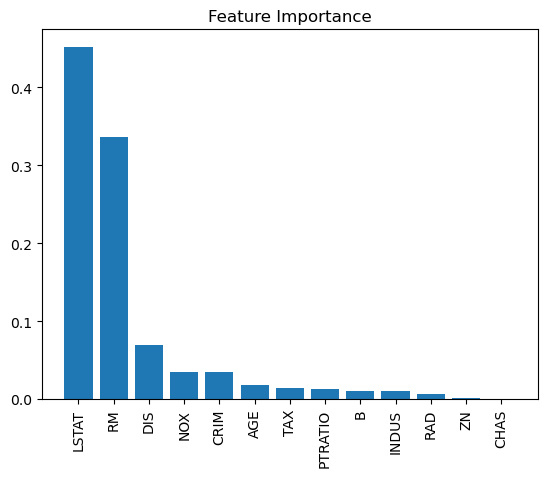

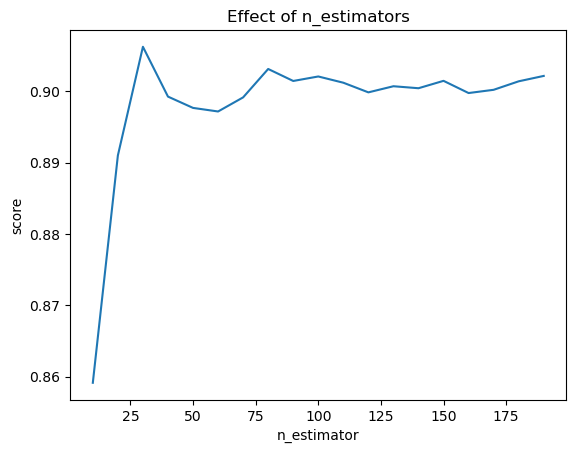

In [27]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(x_train, y_train)
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x_train.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)


In [28]:
scores

[0.8591247831717271,
 0.8909938957422283,
 0.9062319368447718,
 0.8992478135416446,
 0.8976623458970856,
 0.8971606731001017,
 0.8991386741136633,
 0.9031207783658344,
 0.9014384136294423,
 0.9020692240415404,
 0.9011944641883676,
 0.8998416972636701,
 0.9007001667832519,
 0.900420823101112,
 0.901457087374306,
 0.8997464293668316,
 0.9001998278608216,
 0.9013911556153502,
 0.902147303547136]

In [29]:
np.mean(scores)

0.8980677628183625